Combo ideas:
1. Left hand, right hand, snare, kick
    a) make more variations of this
2. bongo (mixed to one), 


Combos
1. L, R, Both, Flattened
2. L, R, Kick, Snare
3. L, R, Both, Kick
4. L, R, B, HH 

In [4]:
import csv
import os
import note_seq
import numpy as np
import pretty_midi
import pandas as pd
import random
from hvo_sequence import HVO_Sequence
from hvo_sequence.custom_dtypes import Metadata

In [5]:
from dataset_and_API.src import BongoDrumCollection

collection = BongoDrumCollection('dataset_and_API/data/SavedSessions.bz2')
collection

BongoDrumCollection with 3286 users, total of 6640 attempts

In [22]:
for user_data in collection:
    print(user_data)
    pass

----------------------------------------
User ID: 3119
Number of attempts: 3
User Level of Musical Experience: 5
User Exhibition Rating: 5
Attempt 1:
{'attempt_duration': 9.0, 'self_assessment': 1, 'assessment_time': 12.0, 'attempt_tempo': 122.0, 'drum_path': 'Afrocuban/p0000003354__m001__beat__afrocuban__066---068.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00003119--2023-11-29--14-11-34/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Afrocuban', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 5}
Attempt 2:
{'attempt_duration': 12.0, 'self_assessment': 5, 'assessment_time': 13.0, 'attempt_tempo': 120.0, 'drum_path': 'Electronic/249_chicago_jackyourbody16.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00003119--2023-11-29--14-11-34/Part2_BongosAlonWithDrums/attempt_003/groove_metadata.json', 'genre': 'Electronic', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 5}

In [14]:
user_data = collection[300]

print(f'user_id: {user_data.user_id}, number_of_attempts: {user_data.number_of_attempts}')

print(f'user_level_of_musical_experience: {user_data.user_level_of_musical_experience}, user_exhibion_rating: {user_data.user_exhibion_rating}') 

user_id: 5364, number_of_attempts: 1
user_level_of_musical_experience: 5, user_exhibion_rating: 3


In [17]:
attempt_1 = user_data.attempts[0]
#attempt_1
#attempt_1.attempt_duration, attempt_1.genre
print(attempt_1)

{'attempt_duration': 18.0, 'self_assessment': 1, 'assessment_time': 22.0, 'attempt_tempo': 110.0, 'drum_path': 'Afrocuban/p0000003389__m001__beat__afrocuban__028---030.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00005364--2023-12-27--17-48-34/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Afrocuban', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 3}


In [42]:
attempt_1.self_assessment

1

In [22]:
a_1_hvo = attempt_1.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
a_1_hvo.time_signatures
a_1_hvo.tempos

[Tempo = { 
  	 time_step: 0, 
  	 qpm: 110.00011000011
 }]

In [55]:
len(a_1_hvo.hvo)

32

In [3]:
left_hand = 0
right_hand = 0
both = 0
for user in collection:
    for attempt in user.attempts:
        hvo = attempt.load_bongo_loop_hvo_seq()
        hvo.hvo
        for i in range(len(hvo.hvo)):
            if(hvo.hvo[i][0] == 1):
                left_hand += 1
            if(hvo.hvo[i][1] == 1):
                right_hand += 1
            if(hvo.hvo[i][0] == 1 and hvo.hvo[i][1] == 1):
                both += 1


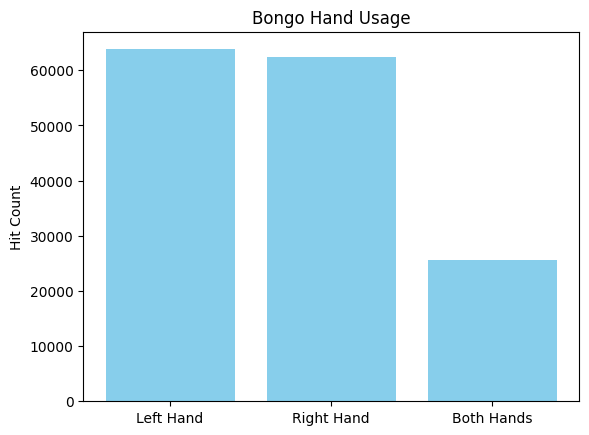

In [4]:
import matplotlib.pyplot as plt

# After your counting loop
labels = ['Left Hand', 'Right Hand', 'Both Hands']
values = [left_hand, right_hand, both]

plt.bar(labels, values, color=['skyblue'])
plt.title('Bongo Hand Usage')
plt.ylabel('Hit Count')
plt.show()

In [8]:
left_hand_all = 0
right_hand_all = 0
both_all = 0
kick_all = 0
snare_all = 0
hh_closed_all = 0
hh_open_all = 0
tom_low_all = 0
tom_mid_all = 0
tom_hi_all = 0
crash_all = 0
ride_all = 0
for user in collection:
    for attempt in user.attempts:
        hvo_full = attempt.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
        
        for i in range(len(hvo.hvo)):
            if(hvo_full.hvo[i][0] == 1):
                left_hand_all += 1
            if(hvo_full.hvo[i][1] == 1):
                right_hand_all += 1
            if(hvo_full.hvo[i][0] == 1 and hvo_full.hvo[i][1] == 1):
                both_all += 1
            if(hvo_full.hvo[i][2] == 1):
                kick_all += 1
            if(hvo_full.hvo[i][3] == 1):
                snare_all += 1
            if(hvo_full.hvo[i][4] == 1):
                hh_closed_all += 1
            if(hvo_full.hvo[i][5] == 1):
                hh_open_all += 1
            if(hvo_full.hvo[i][6] == 1):
                tom_low_all += 1
            if(hvo_full.hvo[i][7] == 1):
                tom_mid_all += 1
            if(hvo_full.hvo[i][8] == 1):
                tom_hi_all += 1
            if(hvo_full.hvo[i][9] == 1):
                crash_all += 1
            if(hvo_full.hvo[i][10] == 1):
                ride_all += 1

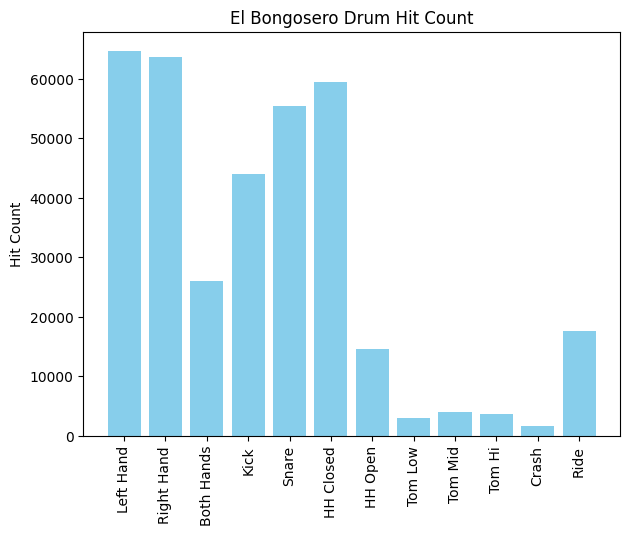

In [9]:
import matplotlib.pyplot as plt

# After your counting loop
labels_all = ['Left Hand', 'Right Hand', 'Both Hands', 'Kick', 'Snare', 'HH Closed', 'HH Open', 'Tom Low', 'Tom Mid', 'Tom Hi', 'Crash', 'Ride']
values_all = [left_hand_all, right_hand_all, both_all, kick_all, snare_all, hh_closed_all, hh_open_all, tom_low_all, tom_mid_all, tom_hi_all, crash_all, ride_all]

plt.bar(labels_all, values_all, color=['skyblue'])
plt.title('El Bongosero Drum Hit Count')
plt.ylabel('Hit Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [10]:
left_hand_merge = 0
right_hand_merge = 0
both_merge = 0
kick_merge = 0
snare_merge = 0
hh_merge = 0
tom_merge = 0
cymbal_merge = 0
for user in collection:
    for attempt in user.attempts:
        hvo_full = attempt.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
        
        for i in range(len(hvo.hvo)):
            if(hvo_full.hvo[i][0] == 1):
                left_hand_merge += 1
            if(hvo_full.hvo[i][1] == 1):
                right_hand_merge += 1
            if(hvo_full.hvo[i][0] == 1 and hvo_full.hvo[i][1] == 1):
                both_merge += 1
            if(hvo_full.hvo[i][2] == 1):
                kick_merge += 1
            if(hvo_full.hvo[i][3] == 1):
                snare_merge += 1
            if(hvo_full.hvo[i][4] == 1 or hvo_full.hvo[i][5] == 1):
                hh_merge += 1
            if(hvo_full.hvo[i][6] == 1 or hvo_full.hvo[i][7] == 1 or hvo_full.hvo[i][8] == 1):
                tom_merge += 1
            if(hvo_full.hvo[i][9] == 1 or hvo_full.hvo[i][10] == 1):
                cymbal_merge += 1

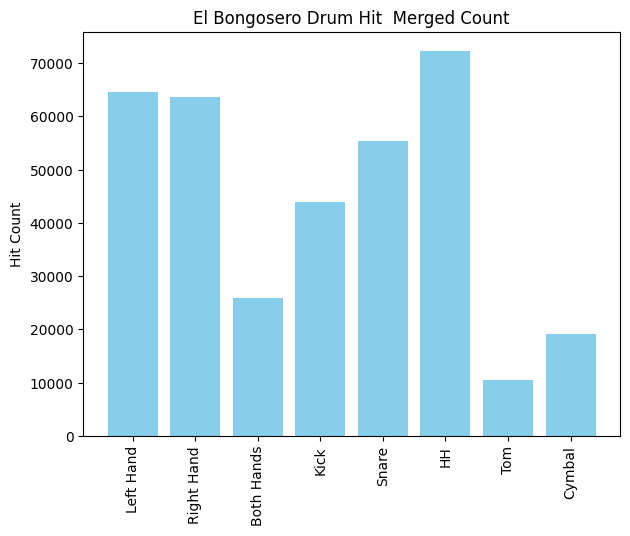

In [11]:
import matplotlib.pyplot as plt

# After your counting loop
labels_merge = ['Left Hand', 'Right Hand', 'Both Hands', 'Kick', 'Snare', 'HH', 'Tom', 'Cymbal']
values_merge = [left_hand_merge, right_hand_merge, both_merge, kick_merge, snare_merge, hh_merge, tom_merge, cymbal_merge]

plt.bar(labels_merge, values_merge, color=['skyblue'])
plt.title('El Bongosero Drum Hit  Merged Count')
plt.ylabel('Hit Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [9]:
hs_bongo = attempt_1.load_bongo_loop_hvo_seq()
hs_bongo.hvo

array([[ 0.        ,  1.        ,  0.        ,  0.4015748 ,  0.        ,
         0.405     ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.71653543,  0.        ,
        -0.072     ],
       [ 1.        ,  1.        ,  0.74015748,  0.76377953, -0.154     ,
        -0.083     ],
       [ 1.        ,  1.        ,  0.60629921,  0.7480315 ,  0.124     ,
         0.087     ],
       [ 0.        ,  1.        ,  0.        ,  0.28346457,  0.        ,
        -0.211     ],
       [ 0.        ,  1.        ,  0.        ,  0.76377953,  0.        ,
        -0.175     ],
       [ 1.        ,  1.        ,  0.71653543,  0.83464567, -0.261     ,
        -0.046     ],
       [ 1.        ,  1.        ,  0.23622047,  0.75590551, -0.279     ,
        -0.1       ],
       [ 0.        ,  1.        ,  0.        ,  0.64566929,  0.        ,
        -0.366     ],
       [ 1.        ,  1.        ,  0.12598425,  0.

In [26]:
hs_drums_and_bongo = attempt_1.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
#proll = hs_drums_and_bongo.piano_roll(show_figure=False, width=600, height=300)
#show(proll)
hs_drums_and_bongo.drum_mapping

'''
{'Left_Hand_Bongo': [64], --> voice 0
 'Right_Hand_Bongo': [63], --> voice 1
 'KICK': [36, 35], --> voice 2
 'SNARE': [38, 37, 40, 39],
 'HH_CLOSED': [42, 22, 44],
 'HH_OPEN': [46, 26],
 'TOM_3_LO': [43, 58, 41],
 'TOM_2_MID': [47, 45],
 'TOM_1_HI': [50, 48],
 'CRASH': [49, 52, 55, 57],
 'RIDE': [51, 53, 59]}
'''

"\n{'Left_Hand_Bongo': [64], --> voice 0\n 'Right_Hand_Bongo': [63], --> voice 1\n 'KICK': [36, 35], --> voice 2\n 'SNARE': [38, 37, 40, 39],\n 'HH_CLOSED': [42, 22, 44],\n 'HH_OPEN': [46, 26],\n 'TOM_3_LO': [43, 58, 41],\n 'TOM_2_MID': [47, 45],\n 'TOM_1_HI': [50, 48],\n 'CRASH': [49, 52, 55, 57],\n 'RIDE': [51, 53, 59]}\n"

In [20]:
both = 0
for i in range(len(hs_drums_and_bongo.hvo)):
    print(hs_drums_and_bongo.hvo[i])
    if(hs_drums_and_bongo.hvo[i][0] == 1 and hs_drums_and_bongo.hvo[i][1] == 1):
        both += 1
print(both)
print(hs_drums_and_bongo.hvo.shape)

[0.        1.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.4015748 0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.405     0.        0.        0.        0.
 0.        0.        0.        0.        0.       ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.71653543  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.072
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
[ 1.          1.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.74015748
  0.76377953  0.          0.65354331  0.          0.          0.
  0.          0.     

In [36]:
len(hs_drums_and_bongo.hvo)
hs_drums_and_bongo.hits.shape

(32, 11)

In [ ]:
# {'Left_Hand_Bongo': [64], --> voice 0
#  'Right_Hand_Bongo': [63], --> voice 1
#  'KICK': [36, 35], --> voice 2
#  'SNARE': [38, 37, 40, 39], --> 3
#  'HH_CLOSED': [42, 22, 44], --> 4
#  'HH_OPEN': [46, 26],
#  'TOM_3_LO': [43, 58, 41], --> 6
#  'TOM_2_MID': [47, 45], --> 7
#  'TOM_1_HI': [50, 48], --> 8
#  'CRASH': [49, 52, 55, 57],
#  'RIDE': [51, 53, 59]}

# -------------------------------------------------------------------
# -----------           ADD META DATA                  --------------
# -------------------------------------------------------------------
from hvo_sequence.custom_dtypes import Metadata
metadata_first_bar = Metadata({
    'title': 'My first score',
    'style': 'Rock',
    'source': 'Dataset X'})
hvo_seq.metadata = metadata_first_bar

# Add additional metadata (Even with new information not in the first bar)
metadata_second_bar = Metadata({
    'title': 'My second score',
    'style': 'Pop',
    'source': 'Dataset Y',
    'human_performance': True})
hvo_seq.metadata.append(metadata_second_bar, start_at_time_step=16)

In [92]:
from hvo_sequence import io_helpers
hvo_loaded_test = io_helpers.load_HVO_Sequence_from_file('bongosero/1463/1463_attempt_num_0_left_right_both_kick.hvo')
#hvo_loaded_test_2 = io_helpers.load_HVO_Sequence_from_file('bongosero/0/0_left_right_snare_kick.hvo')
#hvo_loaded_test_3 = io_helpers.load_HVO_Sequence_from_file('bongosero/1/1_left_right_snare_kick.hvo')

In [13]:
from pickle import load
bongo_1 = load(open("bongosero/hvo_sequences_single_voices/11056/11056_attempt_num_0_left.hvo", "rb"))
bongo_2 = load(open("bongosero/hvo_sequences_single_voices/11056/11056_attempt_num_0_right.hvo", "rb"))
bongo_3 = load(open("bongosero/hvo_sequences_single_voices/11056/11056_attempt_num_0_both.hvo", "rb"))
bongo_4 = load(open("bongosero/hvo_sequences_single_voices/11056/11056_attempt_num_0_flattened.hvo", "rb"))

In [18]:
bongo_1.hvo

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.71653543,
         0.        ,  0.        ,  0.        ,  0.054     ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.7480315 ,
         0.        ,  0.        ,  0.        ,  0.331     ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.67716535,
         0.        ,  0.        ,  0.        , -0.059     ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.77165354,
         0.        ,  0.        ,  0.        ,  0.115     ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.67716535,
         0.        ,  0.        ,  0.        , -0.234     ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.80314961,
         0.        ,  

In [32]:
from pickle import load
p1_r0_both = load(open("taptamdrum_hvo_output_both_is_and/20_p3_rep0/20_p3_rep0_both.hvo", "rb"))
p1_r0_l = load(open("taptamdrum_hvo_output_both_is_and/20_p3_rep0/20_p3_rep0_left.hvo", "rb"))
p1_r0_r = load(open("taptamdrum_hvo_output_both_is_and///20_p3_rep0/20_p3_rep0_right.hvo", "rb"))
p1_r0_f = load(open("taptamdrum_hvo_output_both_is_and/20_p3_rep0/20_p3_rep0_flattened.hvo", "rb"))


In [33]:
print(p1_r0_both.hvo)

print(p1_r0_r.hvo)
print(p1_r0_l.hvo)
print(p1_r0_f.hvo)

[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 1.          0.7007874  -0.042     ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.        

In [21]:
from bokeh.io import output_notebook, show
output_notebook()
p1_r0_f.to_html_plot(
    filename="DEMO_PATTERN.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p1669', ...)

In [15]:
from bokeh.io import output_notebook, show
output_notebook()
bongo_2.to_html_plot(
    filename="DEMO_PATTERN.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p1137', ...)

In [16]:
from bokeh.io import output_notebook, show
output_notebook()
bongo_3.to_html_plot(
    filename="DEMO_PATTERN.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p1270', ...)

In [17]:
from bokeh.io import output_notebook, show
output_notebook()
bongo_4.to_html_plot(
    filename="DEMO_PATTERN.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p1403', ...)

In [6]:
target_id = 1921
user = next((u for u in collection if u.user_id == target_id), None)

if user:
    print("Found user:", user)
else:
    print("User not found.")


Found user: ----------------------------------------
User ID: 1921
Number of attempts: 4
User Level of Musical Experience: 2
User Exhibition Rating: 3
Attempt 1:
{'attempt_duration': 8.0, 'self_assessment': 3, 'assessment_time': 11.0, 'attempt_tempo': 120.0, 'drum_path': 'Electronic/673_chicago_moveyourbody89.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00001921--2023-11-12--19-27-05/Part2_BongosAlonWithDrums/attempt_002/groove_metadata.json', 'genre': 'Electronic', 'user_level_of_musical_experience': 2, 'user_exhibion_rating': 3}
Attempt 2:
{'attempt_duration': 8.0, 'self_assessment': 4, 'assessment_time': 11.0, 'attempt_tempo': 107.0, 'drum_path': 'Afrocuban/p0000003523__m001__beat__afrocuban__059---061.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00001921--2023-11-12--19-27-05/Part2_BongosAlonWithDrums/attempt_004/groove_metadata.json', 'genre': 'Afrocuban', 'user_level_of_musical_experience': 2, 'user_exhibion_

In [7]:
user.attempts[0]

{'attempt_duration': 8.0, 'self_assessment': 3, 'assessment_time': 11.0, 'attempt_tempo': 120.0, 'drum_path': 'Electronic/673_chicago_moveyourbody89.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00001921--2023-11-12--19-27-05/Part2_BongosAlonWithDrums/attempt_002/groove_metadata.json', 'genre': 'Electronic', 'user_level_of_musical_experience': 2, 'user_exhibion_rating': 3}

In [12]:
from collections import Counter

experience_counter = Counter()
exhibition_counter = Counter()
cont = 0
for user in collection:
    for attempt in user.attempts:
        if (attempt.user_level_of_musical_experience >= 4 and attempt.user_exhibion_rating >= 3):
            cont +=1
print(cont)


2243
